Kalman filter theory including some advance method is extremely hard to learning. Fortunately, it is quite easy to implement them with only few codes. So if your major is signal processing or some similar majors, I will recommend you to dive down to study its theory for it will help you build a top level understanding. However, for most of general students, it's enough to understand what it is and how to use it. In this project, it will include typical kalman filters as follows:
1. Scalar Kalman Filter
2. Vector Kalman Filter
3. Extended Kalman Filter

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

# 1. Scalar Kalman Filter
Input:$$(x[n], \hat{s}[n-1|n-1], M[n-1|n-1], \sigma_u^2, \sigma_n^2)$$

where:$$x[n]=s[n]+w[n],w[n]\sim N(0,\sigma_n^2)$$

$$s[n]=s[n-1]+u[n],u[n]\sim N(0,\sigma_u^2)$$

Prediction:$$\hat{s}[n|n-1]=a\hat{s}[n-1|n-1]$$

Min prediction MSE:$$M[n|n-1]=a^2M[n-1|n-1]+\sigma_u^2$$

Kalman gain:$$K[n]=\frac{M[n|n-1]}{\sigma_n^2+M[n|n-1]}$$

Correct:$$\hat{s}[n|n]=\hat{s}[n|n-1]+K[n]\cdot(x[n]-\hat{s}[n|n-1])$$

Min MSE:$$M[n|n]=(1-K[n])\cdot M[n|n-1]$$

In [2]:
class ScalarKalmanFilter:
    def __init__(self, a, s_n_1, M_n_1, sigma_u, sigma_n):
        '''
        Note: The all input args is scalar.
        '''
        self.x_n = None
        self.a = a
        self.s_n_1 = s_n_1
        self.M_n_1 = M_n_1
        self.sigma_u = sigma_u
        self.sigma_n = sigma_n
    
    def forward(self, x_n):
        self.x_n = x_n
        self.predict()
        self.s_n_1 = self.s_n_n_1 + self.K_n*(self.x_n - self.s_n_n_1) # 4.Correct
        self.M_n_1 = (1 - self.K_n)*self.M_n_n_1 # 5.Min MSE
        
        return self.s_n_1
        
    def predict(self):
        self.s_n_n_1 = self.a * self.s_n_1 # 1.prediction
        self.M_n_n_1 = self.a**2*self.M_n_1 + self.sigma_u**2 # 2.Min prediction MSE
        self.K_n = self.M_n_n_1/(self.sigma_n**2 + self.M_n_n_1) # 3.Kalman gain
        
    def __call__(self,x_n):
        return self.forward(x_n)

In [3]:
s = 5*0.95**np.arange(100)
x = s + np.random.randn(*s.shape)

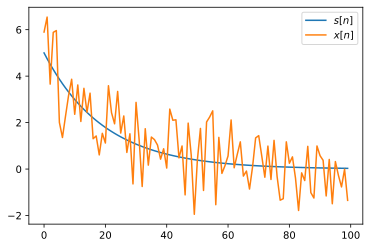

In [4]:
plt.plot(s, label = r'$s[n]$')
plt.plot(x, label = r'$x[n]$')
plt.legend(loc = 'upper right')

In [5]:
s_hat = []
myScalarKalmanFilter = ScalarKalmanFilter(0.95, 5, 1, 0.1, 1)
for x_n in x:
    s_n = myScalarKalmanFilter(x_n)
    s_hat.append(s_n)

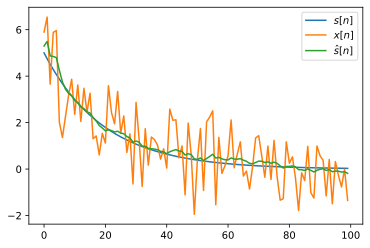

In [6]:
plt.plot(s, label = r'$s[n]$')
plt.plot(x, label = r'$x[n]$')
plt.plot(s_hat, label = r'$\hat{s}[n]$')
plt.legend(loc = 'upper right')

# 2. Vector Kalman Filter

The formula is too long that I don't want to type it out. Thanks!!!😜

Note: It need to calculate the inverse of matrix. Please make sure there are few observation input variables.

In [7]:
class VectorKalmanFilter:
    def __init__(self, s, M, A, B, H, Q, C):
        '''
        The number of observations is m; The number of signal estimates is p.
            s(n) = As(n-1) + Bu(n)
            x(n) = H(n)s(n) + w(n)
        The shape of input variables:
            s: (p,1) The estimates you want.
            A: (p,p) 
            B: (p,p) 
            M: (p,p) M(-1) = Cs, where s(-1) ~ N(mu_s, Cs)
            H: (m,p) 
            Q: (m,m) u(n) ~ N(0, Q)
            C: (p,p) w(n) ~ N(0, C)
        '''
        self.x_n_1 = None
        self.s_n_1 = s
        self.M_n_1 = M
        self.A = A
        self.B = B
        self.H = H
        self.Q = Q
        self.C = C
    
    def forward(self, x_n):
        self.x_n_1 = x_n
        self.predict()
        self.s_n_1 = self.s_n_n_1 + self.K_n@(x_n - self.H@self.s_n_n_1)
        self.M_n_1 = (np.eye(self.K_n.shape[0]) - self.K_n@self.H)@self.M_n_n_1
        
        return self.s_n_1
    
    def predict(self):
        self.s_n_n_1 = self.A@self.s_n_1 # 1.prediction
        self.M_n_n_1 = self.A@self.M_n_1@self.A.T + self.B@self.Q@self.B.T # 2.Min prediction MSE
        self.K_n = self.M_n_n_1@self.H.T@np.linalg.inv(self.C + self.H@self.M_n_n_1@self.H.T) # 3.Kalman gain
    

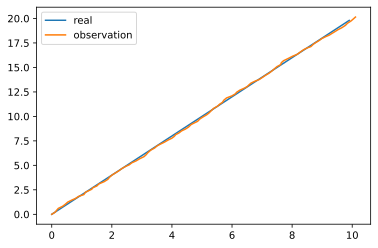

In [8]:
dt = 0.1
vx = 1
vy = 2
x_r = 0 + vx * np.arange(100)*dt
y_r = 0 + vy * np.arange(100)*dt
#observation
vx_o = 0.3*np.random.randn(*x_r.shape) + vx
vy_o = 0.3*np.random.randn(*x_r.shape) + vy
x_o = [0]
y_o = [0]
for i,j in zip(vx_o[1:],vy_o[1:]):
    x_o.append(x_o[-1] + i*dt)
    y_o.append(y_o[-1] + j*dt)
x_o = np.array(x_o)
y_o = np.array(y_o)
plt.plot(x_r,y_r, label = 'real')
plt.plot(x_o,y_o, label = 'observation')
plt.legend()

In [9]:
s = np.array([[0],[0],[vx],[vy]]) # s(-1)
M = np.eye(4)
A = np.eye(4)
A[0,2] = dt
A[1,3] = dt
B = np.eye(4)
H = np.array([[0,0,1,0],[0,0,0,1]])
Q = np.zeros((4,4))
Q[2,2] = 0
Q[3,3] = 0
C = np.eye(2)*0.3
xn = np.vstack((vx_o.reshape(1,-1), vy_o.reshape(1,-1)))
xn[:,0:1]

array([[1.19116264],
       [2.01904835]])

In [10]:
s, M, A, B, H, Q, C

(array([[0],
        [0],
        [1],
        [2]]),
 array([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]]),
 array([[1. , 0. , 0.1, 0. ],
        [0. , 1. , 0. , 0.1],
        [0. , 0. , 1. , 0. ],
        [0. , 0. , 0. , 1. ]]),
 array([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]]),
 array([[0, 0, 1, 0],
        [0, 0, 0, 1]]),
 array([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]),
 array([[0.3, 0. ],
        [0. , 0.3]]))

In [11]:
myVectorKalmanFilter = VectorKalmanFilter(s, M, A, B, H, Q, C)

In [12]:
s_list = []
for i in range(xn.shape[1]):
    s_list.append(myVectorKalmanFilter.forward(xn[:,i:i+1]))
s_list = np.array(s_list)

In [13]:
x_f = s_list[:,0,0]
y_f = s_list[:,1,0]
vx_f = s_list[:,2,0]
vy_f = s_list[:,3,0]

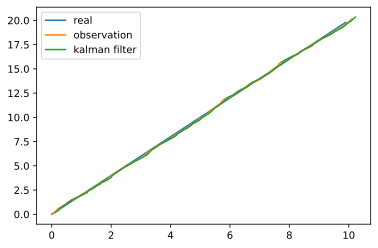

In [14]:
plt.plot(x_r,y_r, label = 'real')
plt.plot(x_o,y_o, label = 'observation')
plt.plot(x_f,y_f, label = 'kalman filter')
plt.legend()

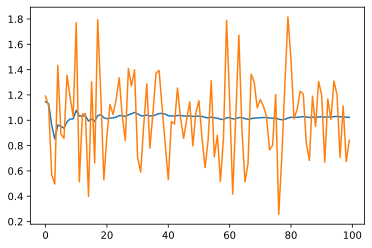

In [15]:
plt.plot(vx_f, label = 'kalman filter')
plt.plot(vx_o, label = 'kalman filter')

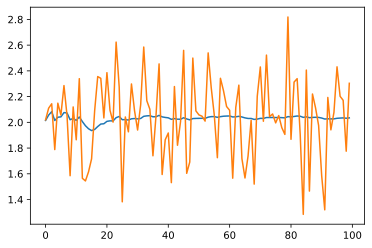

In [16]:
plt.plot(vy_f, label = 'kalman filter')
plt.plot(vy_o, label = 'kalman filter')

In [17]:
np.linalg.norm(x_r - x_o),np.linalg.norm(x_r - x_f)

(1.3120497273647973, 2.3603806908787095)

In [18]:
np.linalg.norm(y_r - y_o),np.linalg.norm(y_r - y_f)

(2.117213624643862, 3.9177069814656043)